<a href="https://colab.research.google.com/github/kaliautkarsh98/fruit-360-classification-/blob/master/fruits360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                                 title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
imoore/60k-stack-overflow-questions-with-quality-rate               60k Stack Overflow Questions with Quality Rating     21MB  2020-09-08 09:26:05            507  
ihelon/lego-minifigures-classification                              LEGO Minifigures Classification                      12MB  2020-09-08 16:48:53            545  
anikannal/solar-power-generation-data                               Solar Power Generation Data                           2MB  2020-08-18 15:52:03           2429  
douglaskgaraujo/opportunity-insights-real-time-economic-tracker-us  Opportunity Insights real time Economic Tracker US   22MB  2020-09-07 18:23:07

In [2]:
! kaggle datasets download -d moltean/fruits

 98% 745M/760M [00:06<00:00, 119MB/s]
100% 760M/760M [00:06<00:00, 124MB/s]


In [3]:
! unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

In [4]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
os.listdir('/content/fruits-360/Training')

['Grape White 2',
 'Pepper Green',
 'Pear Williams',
 'Banana Red',
 'Cauliflower',
 'Nectarine Flat',
 'Plum',
 'Clementine',
 'Redcurrant',
 'Mango',
 'Cherry 1',
 'Pitahaya Red',
 'Strawberry',
 'Chestnut',
 'Huckleberry',
 'Apricot',
 'Pear Abate',
 'Avocado',
 'Strawberry Wedge',
 'Salak',
 'Tangelo',
 'Cucumber Ripe 2',
 'Physalis with Husk',
 'Blueberry',
 'Cherry Wax Red',
 'Kumquats',
 'Raspberry',
 'Grape Blue',
 'Cherry 2',
 'Rambutan',
 'Cantaloupe 2',
 'Pepino',
 'Pear Forelle',
 'Cantaloupe 1',
 'Grapefruit White',
 'Hazelnut',
 'Carambula',
 'Peach 2',
 'Mangostan',
 'Mandarine',
 'Tomato 1',
 'Pomelo Sweetie',
 'Cherry Wax Yellow',
 'Eggplant',
 'Plum 3',
 'Tomato 2',
 'Tomato Yellow',
 'Avocado ripe',
 'Physalis',
 'Banana Lady Finger',
 'Apple Golden 3',
 'Pear 2',
 'Peach Flat',
 'Corn',
 'Pear Monster',
 'Lemon Meyer',
 'Mango Red',
 'Apple Granny Smith',
 'Papaya',
 'Mulberry',
 'Watermelon',
 'Pear Red',
 'Maracuja',
 'Tomato not Ripened',
 'Pepper Yellow',
 'Pear

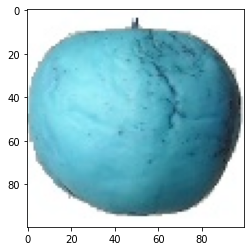

In [5]:
path='/content/fruits-360/Training/Apple Golden 1/0_100.jpg'
im=cv2.imread(path)
plt.imshow(im)
# without rgb plotting

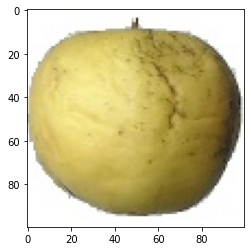

In [6]:
b,g,r=cv2.split(im)
im2=cv2.merge([r,g,b])
plt.imshow(im2)

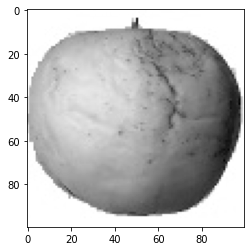

In [7]:
grayim=cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY)
plt.imshow(grayim,cmap='gray')

In [8]:
grayim
# 255 means white and 0 black 

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
grayim.shape

(100, 100)

In [10]:
grayim=grayim.astype('float')/255
grayim

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [11]:
#convert 100*100 into 10000 datapoints
grayim=grayim.flatten()
grayim=pd.Series(grayim)
grayim

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float64

In [13]:
# for each image flatten the pixels each pixel is a feature 
path='/content/fruits-360/Training/'
cols = np.arange(grayim.shape[0])
df = pd.DataFrame(columns = cols)
labelcol = []

fruitlist = os.listdir(path)
x = 0

for f in fruitlist[0:9] : 
    fruitpath = '%s%s' % (path,f)
    
    imagelist = os.listdir(fruitpath)
    
    for i in imagelist:
        imagepath = '%s/%s' % (fruitpath,i)
    
        image = cv2.imread(imagepath)
    
        b,g,r = cv2.split(image)
        image = cv2.merge([r,g,b])
    
        imagegray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
        imagegray = imagegray.astype('float')/255
    
        imagegray = imagegray.flatten()
    
        df.loc[x] = imagegray
    
        x = df.shape[0] + 1
        labelcol.append(f)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.996078,0.996078,0.996078,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,...,0.988235,0.996078,0.996078,0.988235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,...,0.992157,0.996078,0.996078,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.992157,0.996078,1.000000,0.992157,1.000000,1.000000,0.992157,0.996078,1.000000,0.996078,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,...,0.996078,0.996078,0.988235,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,...,0.988235,0.992157,0.992157,0.996078,0.996078,0.992157,0.992157,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,...,0.980392,0.992157,0.996078,0.988235,0.988235,0.996078,0.996078,0.992157,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,1.00

In [15]:
df['label']=labelcol

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.996078,0.996078,0.996078,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.988235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grape White 2
2,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,...,0.996078,0.996078,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grape White 2
3,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.992157,0.996078,1.000000,0.992157,1.000000,1.000000,0.992157,0.996078,1.000000,0.996078,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,...,0.996078,0.988235,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grape White 2
4,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,...,0.992157,0.992157,0.996078,0.996078,0.992157,0.992157,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grape White 2
5,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.992157,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,0.996078,...,0.992157,0.996078,0.988235,0.988235,0.996078,0.996078,0.992157,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grape White 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000

In [19]:
df['label'].value_counts(normalize=True)

Cauliflower       0.155138
Redcurrant        0.108729
Grape White 2     0.108287
Clementine        0.108287
Pear Williams     0.108287
Banana Red        0.108287
Nectarine Flat    0.106077
Plum              0.098785
Pepper Green      0.098122
Name: label, dtype: float64

In [21]:
#shuffle the dataset so that almost equitable dist btw trainning and test dataset can be made
df=shuffle(df).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,label
0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Pear Williams
1,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Pear Williams
2,1.000000,1.000000,1.0,1.0,1.0,1.0,0.996078,0.996078,0.996078,0.996078,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.996078,0.996078,1.000000,1.000000,0.992157,0.996078,0.996078,0.996078,0.988235,0.996078,0.996078,0.992157,0.996078,0.988235,0.996078,0.992157,0.980392,0.980392,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Clementine
3,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,1.000000,0.996078,0.996078,0.996078,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,0.992157,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Clementine
4,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,1.000000,1.000000,0.992157,0.996078,1.000000,0.992157,0.996078,1.000000,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,...,0.470588,0.537255,0.627451,0.721569,0.800000,0.862745,0.976471,0.996078,0.996078,1.0,0.988235,0.992157,0.988235,0.996078,1.0,1.0,1.0,0.996078,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Grape White 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,1.000000,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,...,0.996078,0.992157,0.988235,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0000

In [22]:
#shuffle the columns as well
df_t= shuffle(df.transpose())
df=df_t.transpose()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
x=df.drop('label',axis=1)
y=df['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,stratify=y)

In [27]:
#svm 
from sklearn.svm import SVC
svm_model=SVC().fit(x_train,y_train)
trainscore=svm_model.score(x_train,y_train)
testscore=svm_model.score(x_test,y_test)
y_pred=svm_model.predict(x_test)


In [28]:
print('classification report for svm')
print('confusion matrix')
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print(testscore)
print(trainscore)


classification report for svm
confusion matrix
[[123   0   0   0   0   0   0   0   0]
 [  0 176   0   0   0   0   0   0   0]
 [  0   0 123   0   0   0   0   0   0]
 [  0   0   0 122   0   0   0   0   0]
 [  0   0   0   0 120   0   0   0   0]
 [  0   0   0   0   0 122   0   0   0]
 [  0   0   0   0   0   0 111   0   0]
 [  0   0   0   0   0   0   0 112   0]
 [  0   0   0   0   0   0   0   0 123]]

                precision    recall  f1-score   support

    Banana Red       1.00      1.00      1.00       123
   Cauliflower       1.00      1.00      1.00       176
    Clementine       1.00      1.00      1.00       123
 Grape White 2       1.00      1.00      1.00       122
Nectarine Flat       1.00      1.00      1.00       120
 Pear Williams       1.00      1.00      1.00       122
  Pepper Green       1.00      1.00      1.00       111
          Plum       1.00      1.00      1.00       112
    Redcurrant       1.00      1.00      1.00       123

      accuracy                        

In [31]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(C=2).fit(x_train,y_train)
train=lr.score(x_train,y_train)
test=lr.score(x_test,y_test)

y_pred_lr=lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
print("CLASSIFICATION REPORT FOR LOGISTIC REGRESSION")
print("Confusion MAtrix : ")
print(confusion_matrix(y_test,y_pred_lr))
print()
print(classification_report(y_test,y_pred_lr))
print("train score:",train)
print("test_score",test)

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
Confusion MAtrix : 
[[123   0   0   0   0   0   0   0   0]
 [  0 176   0   0   0   0   0   0   0]
 [  0   0 123   0   0   0   0   0   0]
 [  0   0   0 122   0   0   0   0   0]
 [  0   0   0   0 120   0   0   0   0]
 [  0   0   0   0   0 122   0   0   0]
 [  0   0   0   0   0   0 111   0   0]
 [  0   0   0   0   0   0   0 112   0]
 [  0   0   0   0   0   0   0   0 123]]

                precision    recall  f1-score   support

    Banana Red       1.00      1.00      1.00       123
   Cauliflower       1.00      1.00      1.00       176
    Clementine       1.00      1.00      1.00       123
 Grape White 2       1.00      1.00      1.00       122
Nectarine Flat       1.00      1.00      1.00       120
 Pear Williams       1.00      1.00      1.00       122
  Pepper Green       1.00      1.00      1.00       111
          Plum       1.00      1.00      1.00       112
    Redcurrant       1.00      1.00      1.00       123

      accuracy     